<a href="https://colab.research.google.com/github/hnur79997-stack/citra-digital/blob/main/tugas7_citra_digital.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

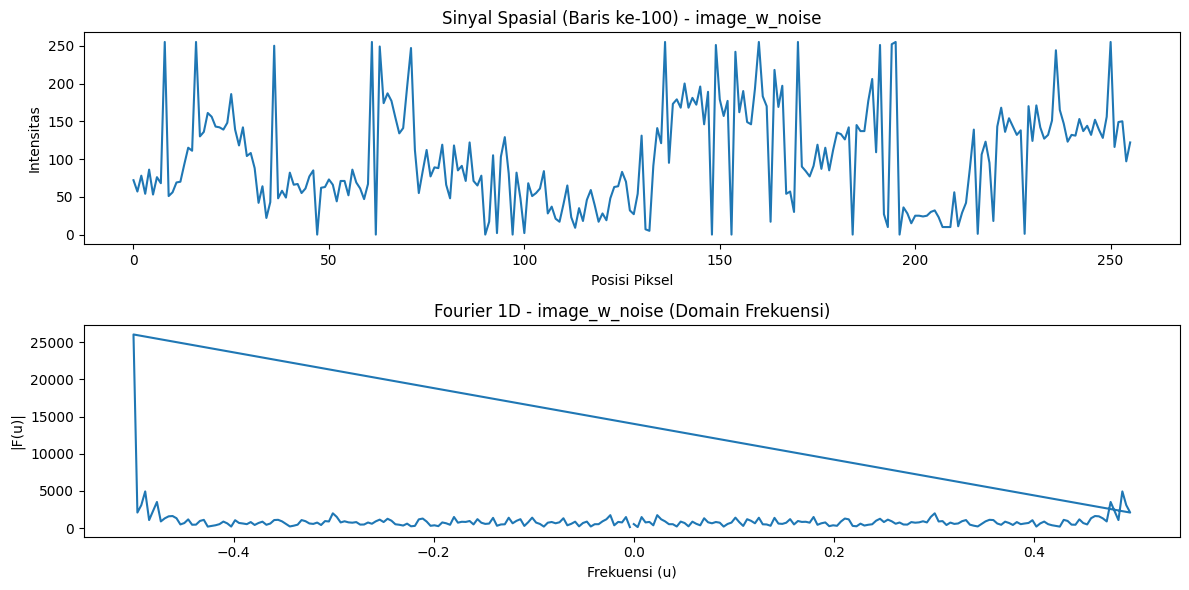

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Baca gambar dan ubah ke grayscale
noise_img = cv2.imread('image_w_noise.png', 0)   # jika .png, ubah sesuai
if noise_img is None:
    print("Gambar tidak ditemukan! Cek nama file dan lokasinya.")
    exit()

# 2. Ambil satu baris (misal baris ke-100)
row_noise = noise_img[100, :]

# 3. Fourier Transform 1D
F_noise = np.fft.fft(row_noise)
Fshift_noise = np.fft.fftshift(F_noise)

# 4. Magnitude spectrum
magnitude_noise = np.abs(Fshift_noise)
freq_noise = np.fft.fftfreq(len(row_noise))

# 5. Plot hasil
plt.figure(figsize=(12,6))

plt.subplot(2,1,1)
plt.plot(row_noise)
plt.title('Sinyal Spasial (Baris ke-100) - image_w_noise')
plt.xlabel('Posisi Piksel')
plt.ylabel('Intensitas')

plt.subplot(2,1,2)
plt.plot(freq_noise, magnitude_noise)
plt.title('Fourier 1D - image_w_noise (Domain Frekuensi)')
plt.xlabel('Frekuensi (u)')
plt.ylabel('|F(u)|')

plt.tight_layout()
plt.show()


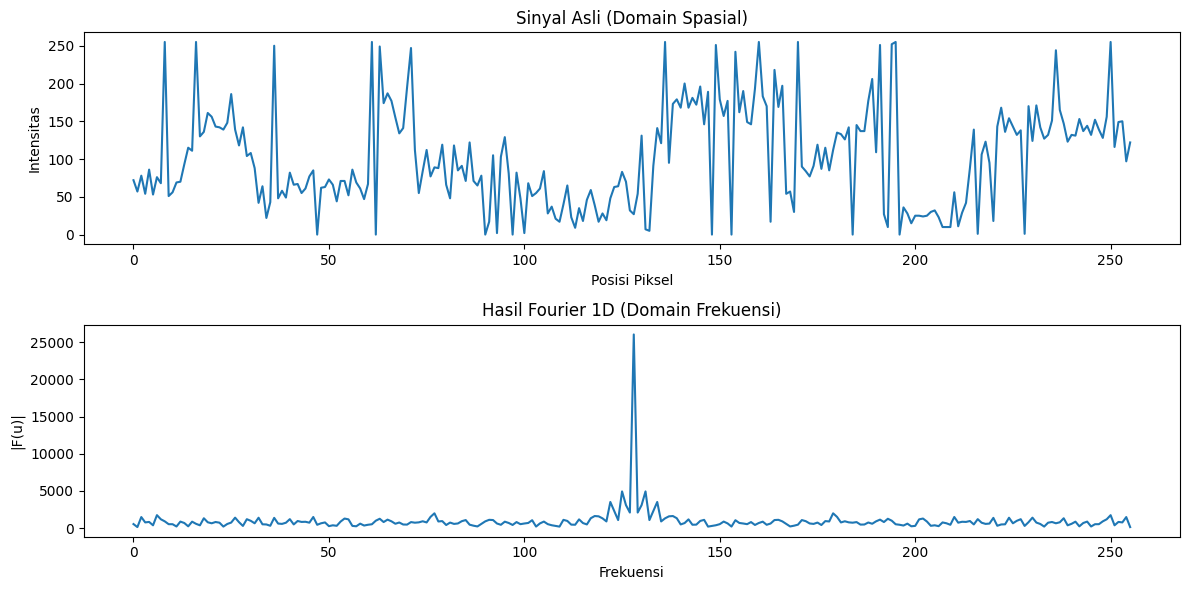

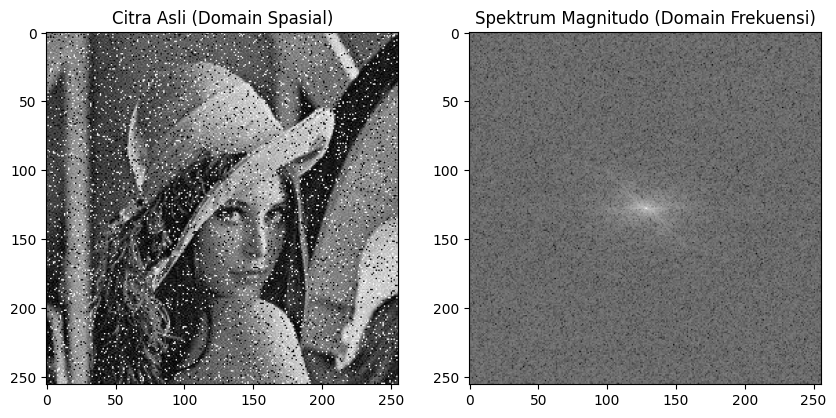

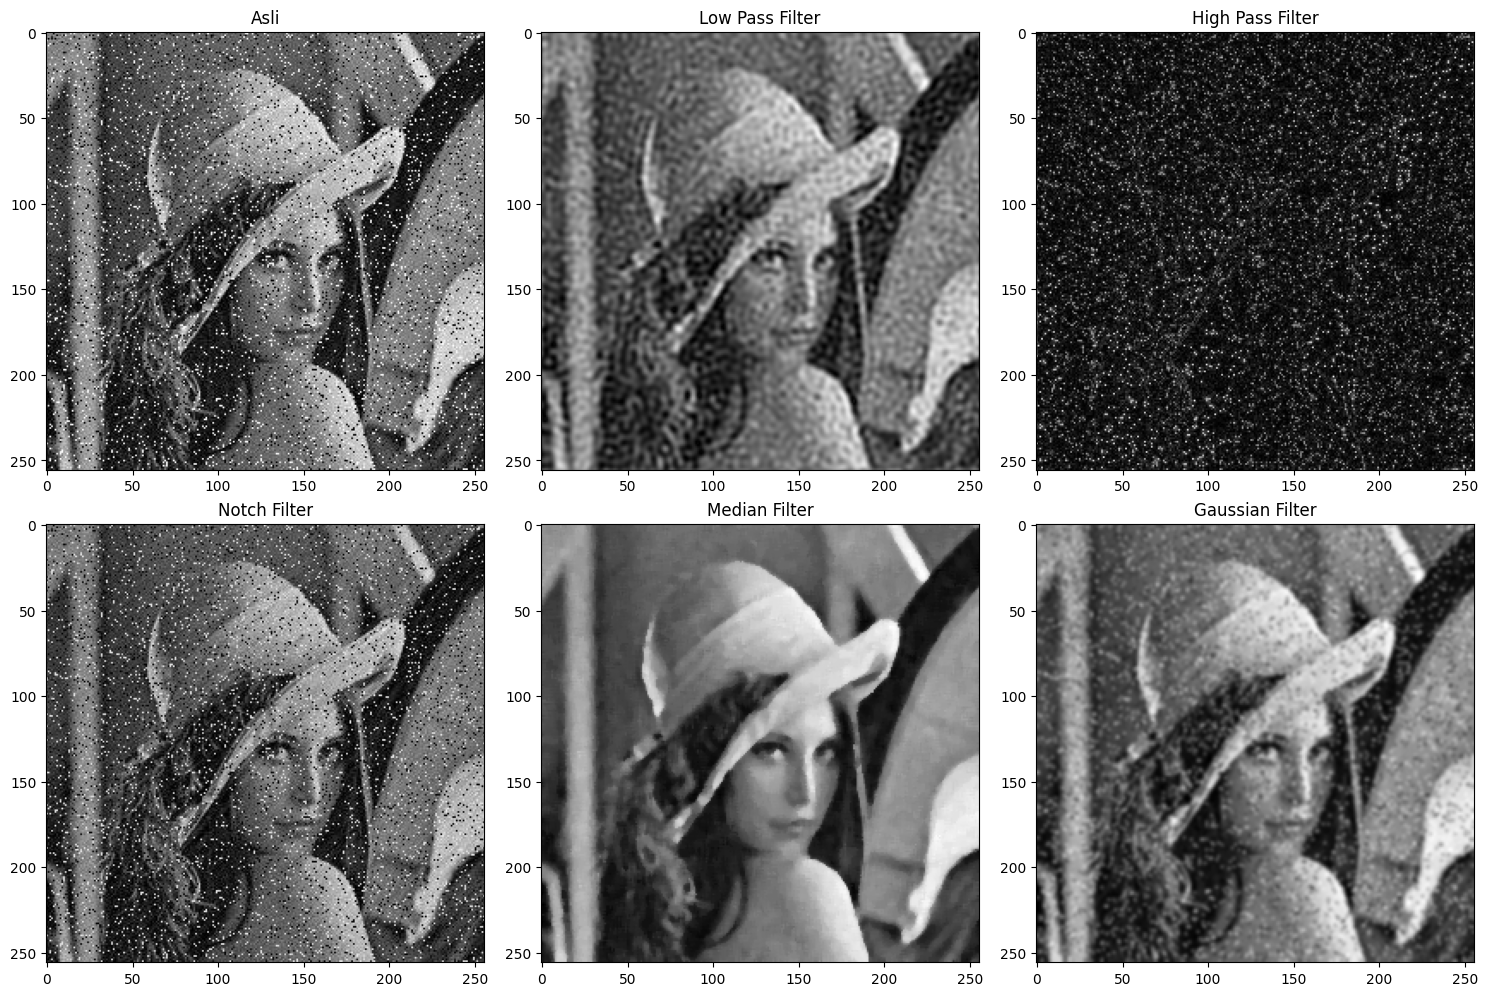

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1️⃣ Baca gambar grayscale
img = cv2.imread('image_w_noise.png', 0)

# ---------------------------
# BAGIAN 1: Fourier Transform 1D
# ---------------------------
row = img[100, :]  # Ambil satu baris citra (misalnya baris ke-100)
F = np.fft.fft(row)
Fshift = np.fft.fftshift(F)
magnitude = np.abs(Fshift)
freq = np.fft.fftfreq(len(row))

plt.figure(figsize=(12,6))
plt.subplot(2,1,1)
plt.plot(row)
plt.title('Sinyal Asli (Domain Spasial)')
plt.xlabel('Posisi Piksel')
plt.ylabel('Intensitas')

plt.subplot(2,1,2)
plt.plot(magnitude)
plt.title('Hasil Fourier 1D (Domain Frekuensi)')
plt.xlabel('Frekuensi')
plt.ylabel('|F(u)|')
plt.tight_layout()
plt.show()


# ---------------------------
# BAGIAN 2: Fourier Transform 2D
# ---------------------------
F2 = np.fft.fft2(img)
F2shift = np.fft.fftshift(F2)
magnitude_spectrum = 20 * np.log(np.abs(F2shift) + 1)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title('Citra Asli (Domain Spasial)')

plt.subplot(1,2,2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Spektrum Magnitudo (Domain Frekuensi)')
plt.show()


# ---------------------------
# BAGIAN 3: Penghilangan Noise di Domain Frekuensi
# ---------------------------

# a. LOW PASS FILTER (menyimpan frekuensi rendah)
rows, cols = img.shape
crow, ccol = rows//2 , cols//2
mask = np.zeros((rows, cols), np.uint8)
r = 50  # radius filter
cv2.circle(mask, (ccol, crow), r, 1, -1)

low_pass = F2shift * mask
low_pass_img = np.fft.ifft2(np.fft.ifftshift(low_pass))
low_pass_img = np.abs(low_pass_img)


# b. HIGH PASS FILTER (menyimpan frekuensi tinggi)
mask_hp = 1 - mask
high_pass = F2shift * mask_hp
high_pass_img = np.fft.ifft2(np.fft.ifftshift(high_pass))
high_pass_img = np.abs(high_pass_img)


# c. NOTCH FILTER (menghilangkan frekuensi spesifik)
notch = np.ones((rows, cols), np.uint8)
cv2.circle(notch, (ccol + 30, crow + 30), 10, 0, -1)
cv2.circle(notch, (ccol - 30, crow - 30), 10, 0, -1)
notch_filtered = F2shift * notch
notch_img = np.fft.ifft2(np.fft.ifftshift(notch_filtered))
notch_img = np.abs(notch_img)


# d. MEDIAN FILTER (berbasis spasial)
median_filtered = cv2.medianBlur(img, 5)


# e. GAUSSIAN FILTER (berbasis spasial)
gaussian_filtered = cv2.GaussianBlur(img, (5,5), 0)


# ---------------------------
# Tampilkan semua hasil
# ---------------------------
plt.figure(figsize=(15,10))
plt.subplot(2,3,1), plt.imshow(img, cmap='gray'), plt.title('Asli')
plt.subplot(2,3,2), plt.imshow(low_pass_img, cmap='gray'), plt.title('Low Pass Filter')
plt.subplot(2,3,3), plt.imshow(high_pass_img, cmap='gray'), plt.title('High Pass Filter')
plt.subplot(2,3,4), plt.imshow(notch_img, cmap='gray'), plt.title('Notch Filter')
plt.subplot(2,3,5), plt.imshow(median_filtered, cmap='gray'), plt.title('Median Filter')
plt.subplot(2,3,6), plt.imshow(gaussian_filtered, cmap='gray'), plt.title('Gaussian Filter')
plt.tight_layout()
plt.show()

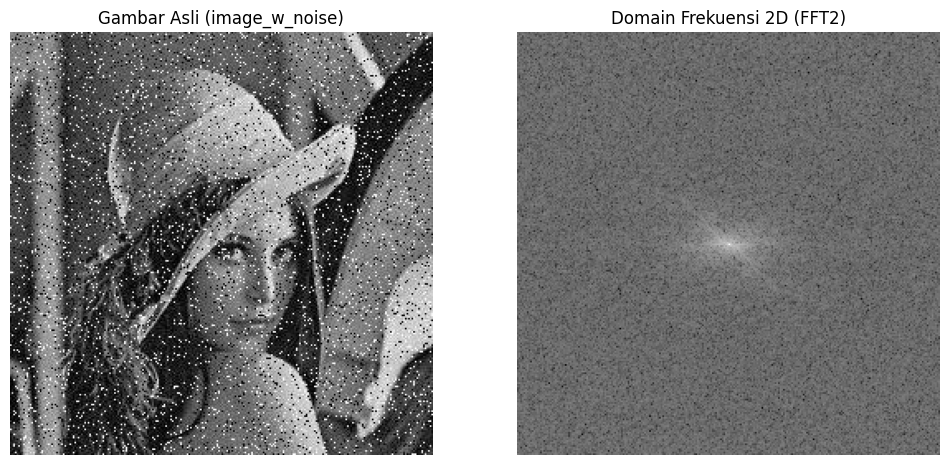

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Baca gambar (grayscale)
noise_img = cv2.imread('image_w_noise.png', 0)   # sesuaikan nama file
if noise_img is None:
    print("Gambar tidak ditemukan! Cek nama file & folder!")
    exit()

# 2. Fourier Transform 2D
F2 = np.fft.fft2(noise_img)
F2shift = np.fft.fftshift(F2)

# 3. Hitung magnitude spectrum
magnitude_spectrum = 20 * np.log(np.abs(F2shift) + 1)   # +1 untuk mencegah log(0)

# 4. Tampilkan hasil
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.imshow(noise_img, cmap='gray')
plt.title('Gambar Asli (image_w_noise)')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Domain Frekuensi 2D (FFT2)')
plt.axis('off')

plt.show()


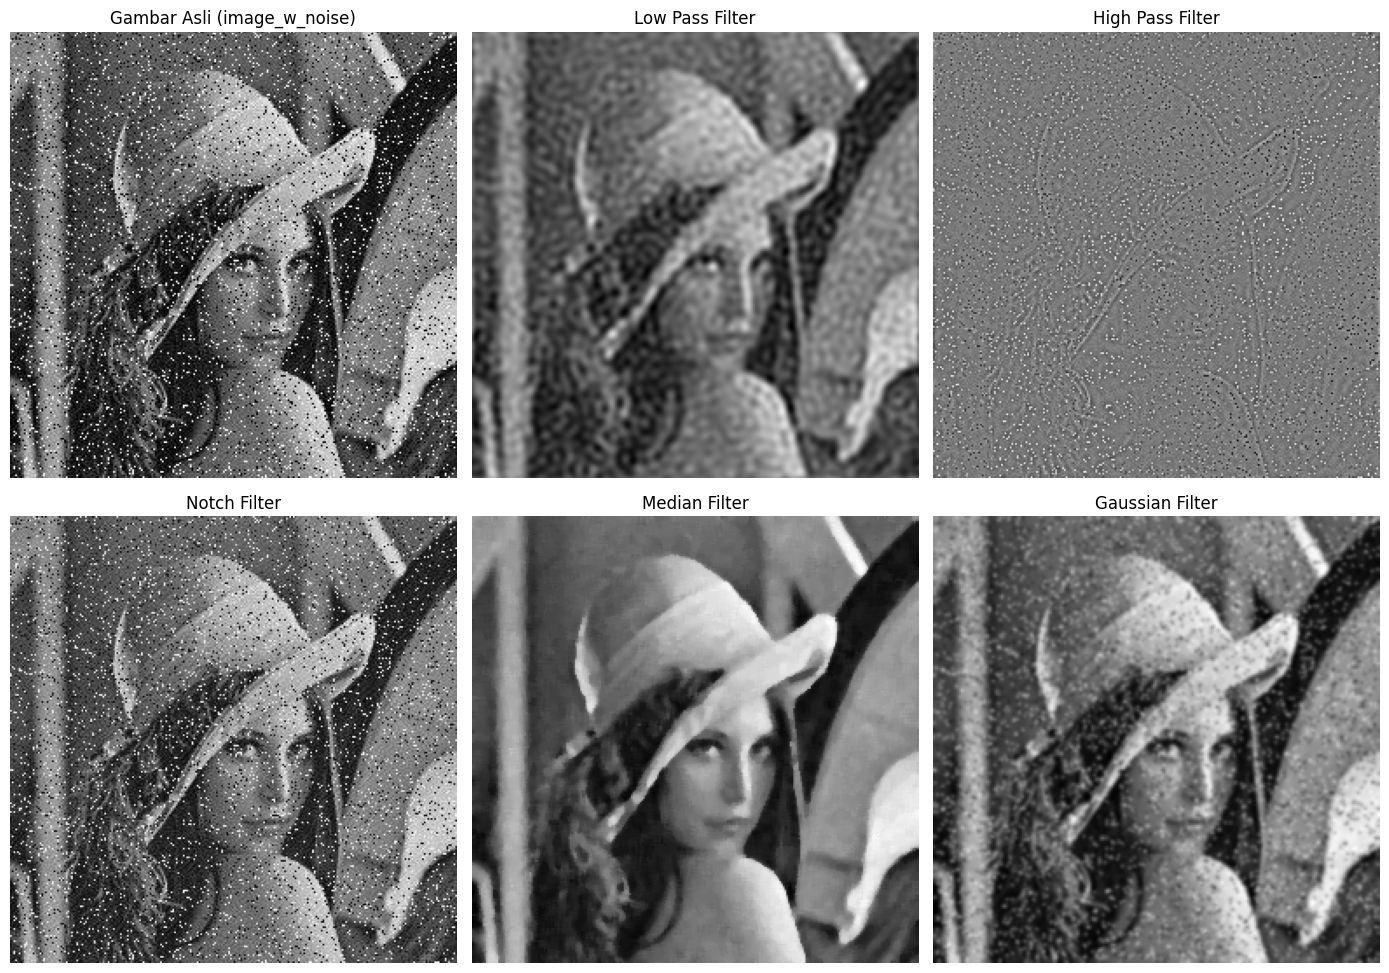

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Baca gambar grayscale
img_noise = cv2.imread('image_w_noise.png', 0)

# 2. Transformasi Fourier 2D
F = np.fft.fft2(img_noise)
Fshift = np.fft.fftshift(F)

# Ukuran citra dan titik tengah
rows, cols = img_noise.shape
crow, ccol = rows // 2, cols // 2

# ==============================
# a. Low Pass Filter (LPF)
# ==============================
mask_lpf = np.zeros((rows, cols), np.uint8)
r = 40  # radius cutoff
cv2.circle(mask_lpf, (ccol, crow), r, 1, thickness=-1)
F_lpf = Fshift * mask_lpf
img_lpf = np.fft.ifft2(np.fft.ifftshift(F_lpf)).real

# ==============================
# b. High Pass Filter (HPF)
# ==============================
mask_hpf = 1 - mask_lpf
F_hpf = Fshift * mask_hpf
img_hpf = np.fft.ifft2(np.fft.ifftshift(F_hpf)).real

# ==============================
# c. Notch Filter
# ==============================
mask_notch = np.ones((rows, cols), np.uint8)
# contoh hilangkan noise periodik di titik tertentu
cv2.circle(mask_notch, (ccol + 60, crow + 60), 10, 0, thickness=-1)
cv2.circle(mask_notch, (ccol - 60, crow - 60), 10, 0, thickness=-1)
F_notch = Fshift * mask_notch
img_notch = np.fft.ifft2(np.fft.ifftshift(F_notch)).real

# ==============================
# d. Median Filter (spasial)
# ==============================
img_median = cv2.medianBlur(img_noise, 5)

# ==============================
# e. Gaussian Filter (spasial)
# ==============================
img_gaussian = cv2.GaussianBlur(img_noise, (5,5), 1)

# ==============================
# Tampilkan Semua Hasil
# ==============================
plt.figure(figsize=(14,10))

plt.subplot(2,3,1)
plt.imshow(img_noise, cmap='gray')
plt.title('Gambar Asli (image_w_noise)')
plt.axis('off')

plt.subplot(2,3,2)
plt.imshow(img_lpf, cmap='gray')
plt.title('Low Pass Filter')
plt.axis('off')

plt.subplot(2,3,3)
plt.imshow(img_hpf, cmap='gray')
plt.title('High Pass Filter')
plt.axis('off')

plt.subplot(2,3,4)
plt.imshow(img_notch, cmap='gray')
plt.title('Notch Filter')
plt.axis('off')

plt.subplot(2,3,5)
plt.imshow(img_median, cmap='gray')
plt.title('Median Filter')
plt.axis('off')

plt.subplot(2,3,6)
plt.imshow(img_gaussian, cmap='gray')
plt.title('Gaussian Filter')
plt.axis('off')

plt.tight_layout()
plt.show()